In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [2]:
import seaborn as sb

In [5]:
df = pd.read_excel('D:\WEBDEV\HackRx\LOAN_DATA.xlsx')
df.head()

,S_NO,NAME,AGE,GENDER,RELATIONSHIP_STATUS,PID1,PID2,PID3,PIDB
0,1,Saket Misra,22,M,U,STL,PIL,PIL,STL
1,2,Ranjan dehuri,34,M,M,HEI,VEL,HEI,HEI
2,3,Bivas Kesar,30,M,U,HEI,HEI,HEI,NaN
3,4,Rani Das,23,F,M,HEI,COL,HEI,HEI
4,5,Neha Das,42,F,M,HEI,EDT,EDT,EDT


In [7]:
df = df.drop('NAME',axis=1)

In [8]:
df.head()

,S_NO,AGE,GENDER,RELATIONSHIP_STATUS,PID1,PID2,PID3,PIDB
0,1,22,M,U,STL,PIL,PIL,STL
1,2,34,M,M,HEI,VEL,HEI,HEI
2,3,30,M,U,HEI,HEI,HEI,NaN
3,4,23,F,M,HEI,COL,HEI,HEI
4,5,42,F,M,HEI,EDT,EDT,EDT


In [9]:
df2 = pd.get_dummies(df)

In [10]:
df2.head()

,S_NO,AGE,GENDER_F,GENDER_M,RELATIONSHIP_STATUS_M,RELATIONSHIP_STATUS_U,PID1_COL,PID1_EAT,PID1_EEE,PID1_EGT,...,PID3_VEL,PIDB_COL,PIDB_EDT,PIDB_EEE,PIDB_EGT,PIDB_HEI,PIDB_HOL,PIDB_PIL,PIDB_STL,PIDB_VEL
0,1,22,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,34,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,30,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,23,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,42,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   S_NO                   50 non-null     int64
 1   AGE                    50 non-null     int64
 2   GENDER_F               50 non-null     uint8
 3   GENDER_M               50 non-null     uint8
 4   RELATIONSHIP_STATUS_M  50 non-null     uint8
 5   RELATIONSHIP_STATUS_U  50 non-null     uint8
 6   PID1_COL               50 non-null     uint8
 7   PID1_EAT               50 non-null     uint8
 8   PID1_EEE               50 non-null     uint8
 9   PID1_EGT               50 non-null     uint8
 10  PID1_HEI               50 non-null     uint8
 11  PID1_HOL               50 non-null     uint8
 12  PID1_PIL               50 non-null     uint8
 13  PID1_STL               50 non-null     uint8
 14  PID1_VEL               50 non-null     uint8
 15  PID2_COL               50 non-null     uin

In [12]:
df2 = df2.drop('S_NO',axis=1)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   AGE                    50 non-null     int64
 1   GENDER_F               50 non-null     uint8
 2   GENDER_M               50 non-null     uint8
 3   RELATIONSHIP_STATUS_M  50 non-null     uint8
 4   RELATIONSHIP_STATUS_U  50 non-null     uint8
 5   PID1_COL               50 non-null     uint8
 6   PID1_EAT               50 non-null     uint8
 7   PID1_EEE               50 non-null     uint8
 8   PID1_EGT               50 non-null     uint8
 9   PID1_HEI               50 non-null     uint8
 10  PID1_HOL               50 non-null     uint8
 11  PID1_PIL               50 non-null     uint8
 12  PID1_STL               50 non-null     uint8
 13  PID1_VEL               50 non-null     uint8
 14  PID2_COL               50 non-null     uint8
 15  PID2_EDT               50 non-null     uin

In [17]:
df_by_age = df2.groupby("AGE")

In [18]:
list(df_by_age)[0]

(19,
     AGE  GENDER_F  GENDER_M  RELATIONSHIP_STATUS_M  RELATIONSHIP_STATUS_U  \
 6    19         1         0                      0                      1   
 7    19         1         0                      0                      1   
 47   19         1         0                      0                      1   
 
     PID1_COL  PID1_EAT  PID1_EEE  PID1_EGT  PID1_HEI  ...  PID3_VEL  PIDB_COL  \
 6          0         0         0         0         0  ...         0         0   
 7          0         0         0         0         0  ...         0         0   
 47         0         0         0         0         0  ...         0         0   
 
     PIDB_EDT  PIDB_EEE  PIDB_EGT  PIDB_HEI  PIDB_HOL  PIDB_PIL  PIDB_STL  \
 6          0         0         0         0         0         1         0   
 7          0         0         0         0         0         1         0   
 47         0         0         0         0         0         0         0   
 
     PIDB_VEL  
 6          0  
 7       

In [19]:
corr_mat = df2.corr()

<AxesSubplot:>

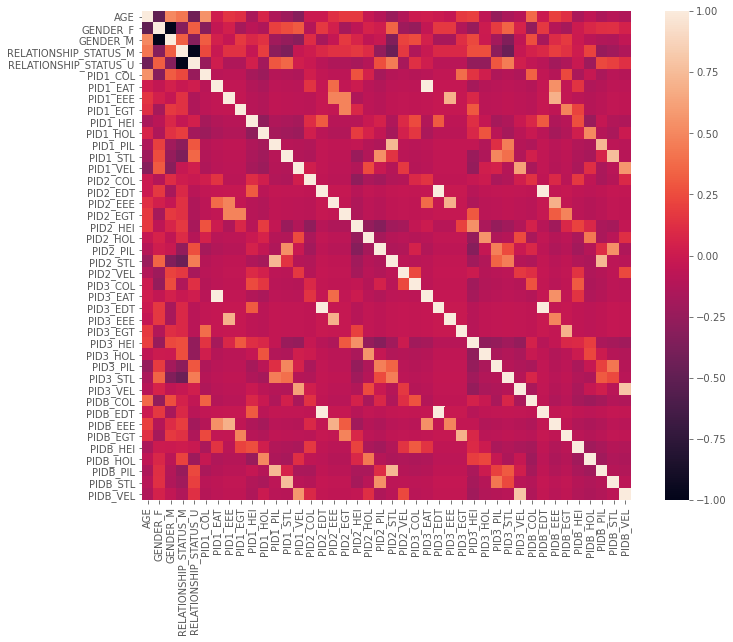

In [21]:
plt.subplots(figsize=(12,9))
sb.heatmap(corr_mat,vmax=1,square = True)